In [1]:
import torch
print(torch.__version__)
torch.cuda.current_device()

1.3.1


0

In [2]:
import pandas as pd
import numpy as np

pre_path = "./"
X_train_path = pre_path + "X_train"
Y_train_path = pre_path + "Y_train"
X_test_path = pre_path + "X_test"

#X_train， 510列的fearture，第一列是id，共有511列

#X_train = pd.read_csv(pre_path + "X_train", engine = "python")  # 注意原文件没有带.csv，看来不是规范的csv文件，用read_csv读出来的第一行不规范
with open(X_train_path) as f:
    l = f.readlines()
    l.pop(0)
    X_train = [ll.strip().split(",")[1:] for ll in l]
    

In [3]:
X_train = np.array(X_train, dtype = float)
X_train.shape

(54256, 510)

In [4]:
with open(Y_train_path) as f:
    l = f.readlines()
    l.pop(0)
    Y_train = [ll.strip().split(",")[1:] for ll in l]

In [5]:
Y_train = np.array(Y_train, dtype = float)
Y_train.shape

(54256, 1)

In [6]:
with open(X_test_path) as f:
    l = f.readlines()
    l.pop(0)
    X_test = [ll.strip().split(",")[1:] for ll in l]

X_test = np.array(X_test, dtype = float)
X_test.shape

(27622, 510)

In [7]:
p = 0.8
X_train_train = X_train[:int(len(X_train)*p), :]
X_train_valid = X_train[int(len(X_train)*p): , :]
Y_train_train = Y_train[:int(len(Y_train)*p), :]
Y_train_valid = Y_train[int(len(Y_train)*p): , :]

In [8]:
import matplotlib.pyplot as plt

In [9]:
import torch
import torch.nn as nn

def convert_to_tensor(X):
    return torch.tensor(X, dtype = torch.float32)

feature_dim = X_train.shape[1]

X_train_train = convert_to_tensor(X_train_train)
X_train_valid = convert_to_tensor(X_train_valid)
Y_train_train = torch.tensor(Y_train_train, dtype = torch.long)
Y_train_valid = torch.tensor(Y_train_valid, dtype = torch.long)

out_dim = 1

model = nn.Sequential(nn.Linear(feature_dim, 1024),
                      #nn.Dropout(0.4),
                     nn.ReLU(),
                     nn.Linear(1024,512),
                      #nn.Dropout(0.4),
                     nn.ReLU(),
                      nn.Linear(512,256),
                      #nn.Dropout(0.4),
                     nn.ReLU(),
                      nn.Linear(256,32),
                      #nn.Dropout(0.4),
                     nn.ReLU(),
                      nn.Linear(32,2)
                     )
optim = torch.optim.Adam(model.parameters(), lr= 0.0001)
loss_func = nn.CrossEntropyLoss()


xx = []
yy_train_loss = []
yy_valid_loss = []
epochs = 30000
min_loss = 100000

model_path = "model_have_valid_2_SGD_0.0001.pkl"

for i in range(1,1+epochs):
    y_hat = model(X_train_train)
    loss = loss_func(y_hat, Y_train_train.squeeze())
    optim.zero_grad()
    loss.backward()
    optim.step()
    if(i%100 == 0 ):
        valid_loss = loss_func(model(X_train_valid), Y_train_valid.squeeze())
        xx.append(i)
        yy_train_loss.append(loss)
        yy_valid_loss.append(valid_loss)
        
        print("{}\t {}\t {}\t".format(i,loss,valid_loss))
        if(valid_loss<min_loss):
            min_loss = valid_loss
            torch.save(model, model_path)

print("over")
print("min_loss:",min_loss)
plt.plot(xx,yy_train_loss,"r", label = "train_loss")
plt.plot(xx,yy_valid_loss,"b", label = "valid_loss")

100	 0.377345472574234	 0.3855764865875244	


/home/u2019101432/.conda/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/u2019101432/.conda/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/u2019101432/.conda/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


200	 0.3011472225189209	 0.3151894211769104	
300	 0.2810265123844147	 0.30164065957069397	
400	 0.27642136812210083	 0.2995511293411255	
500	 0.26627612113952637	 0.29381778836250305	
600	 0.2562032639980316	 0.28831884264945984	
1000	 0.3029569387435913	 0.4272749423980713	
1100	 0.2600027918815613	 0.3243037760257721	
1200	 0.22605042159557343	 0.314761221408844	
1300	 0.21715585887432098	 0.3117659091949463	
1400	 0.20390239357948303	 0.31137585639953613	
1500	 0.19298012554645538	 0.31878986954689026	
1600	 0.1844465583562851	 0.3296383023262024	
1700	 0.21783481538295746	 0.3691961169242859	
1800	 0.17601726949214935	 0.3569048345088959	
1900	 0.17559370398521423	 0.36268898844718933	
2000	 0.16074563562870026	 0.3698745667934418	
2100	 0.14949855208396912	 0.37875211238861084	
2200	 0.1460312306880951	 0.4005833864212036	
2300	 0.1414162963628769	 0.40815865993499756	
2400	 0.1411060392856598	 0.42100411653518677	
2500	 0.1393982619047165	 0.43865594267845154	
2600	 0.12392261624

KeyboardInterrupt: 

over
min_loss: tensor(0.2858, grad_fn=<NllLossBackward>)


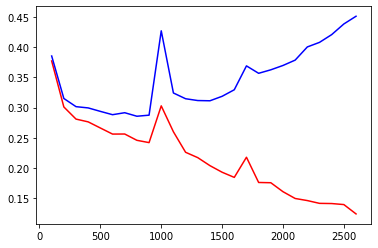

In [10]:
print("over")
print("min_loss:",min_loss)
plt.plot(xx,yy_train_loss,"r", label = "train_loss")
plt.plot(xx,yy_valid_loss,"b", label = "valid_loss")

In [11]:
import torch
import numpy as np

model = torch.load(model_path)
X_test = convert_to_tensor(X_test)
y_pred = model(X_test)
y_pred = y_pred.detach().numpy()
y_result = np.argmax(y_pred, axis = 1)
y_result


array([0, 0, 0, ..., 1, 0, 0])

In [12]:
import csv

file_path = "result_2.csv"

with open(file_path,"w") as f:
    csv_w = csv.writer(f)
    header = ['id','label']
    csv_w.writerow(header)
    for i in range(len(y_result)):
        csv_w.writerow([str(i) , str(y_result[i])])
print("over")

over
